 Import required liberaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amida\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


load the CSV file 

In [3]:
df = pd.read_csv('sentimentdataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


Check the null values

In [4]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


Data Pre-processing and Cleaning

In [6]:
# take a required columns for the analysis
# df = df[['Text', 'Sentiment']]
#print(df)
df = df.drop_duplicates()

import re

def clean_text(text):
    
    text = text.lower() # conver text to lower
    text = re.sub(r'\d+', '', text) # remove the numbers
    text = re.sub(r'[^\w\s]', '', text) # remove the punctuation
    text = text.strip() # remove the extra spaces
    text = re.sub(r'[^A-Za-z\s]', '', text) # remove the special char
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'#\w+', '', text)     # remove hashtags
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)  # remove emoji
    return text

df['cleaned_text'] = df['Text'].apply(clean_text)



In [7]:

df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,cleaned_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying a beautiful day at the park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic was terrible this morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,just finished an amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited about the upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying out a new recipe for dinner tonight


Data Visulization

<Figure size 1500x1000 with 0 Axes>

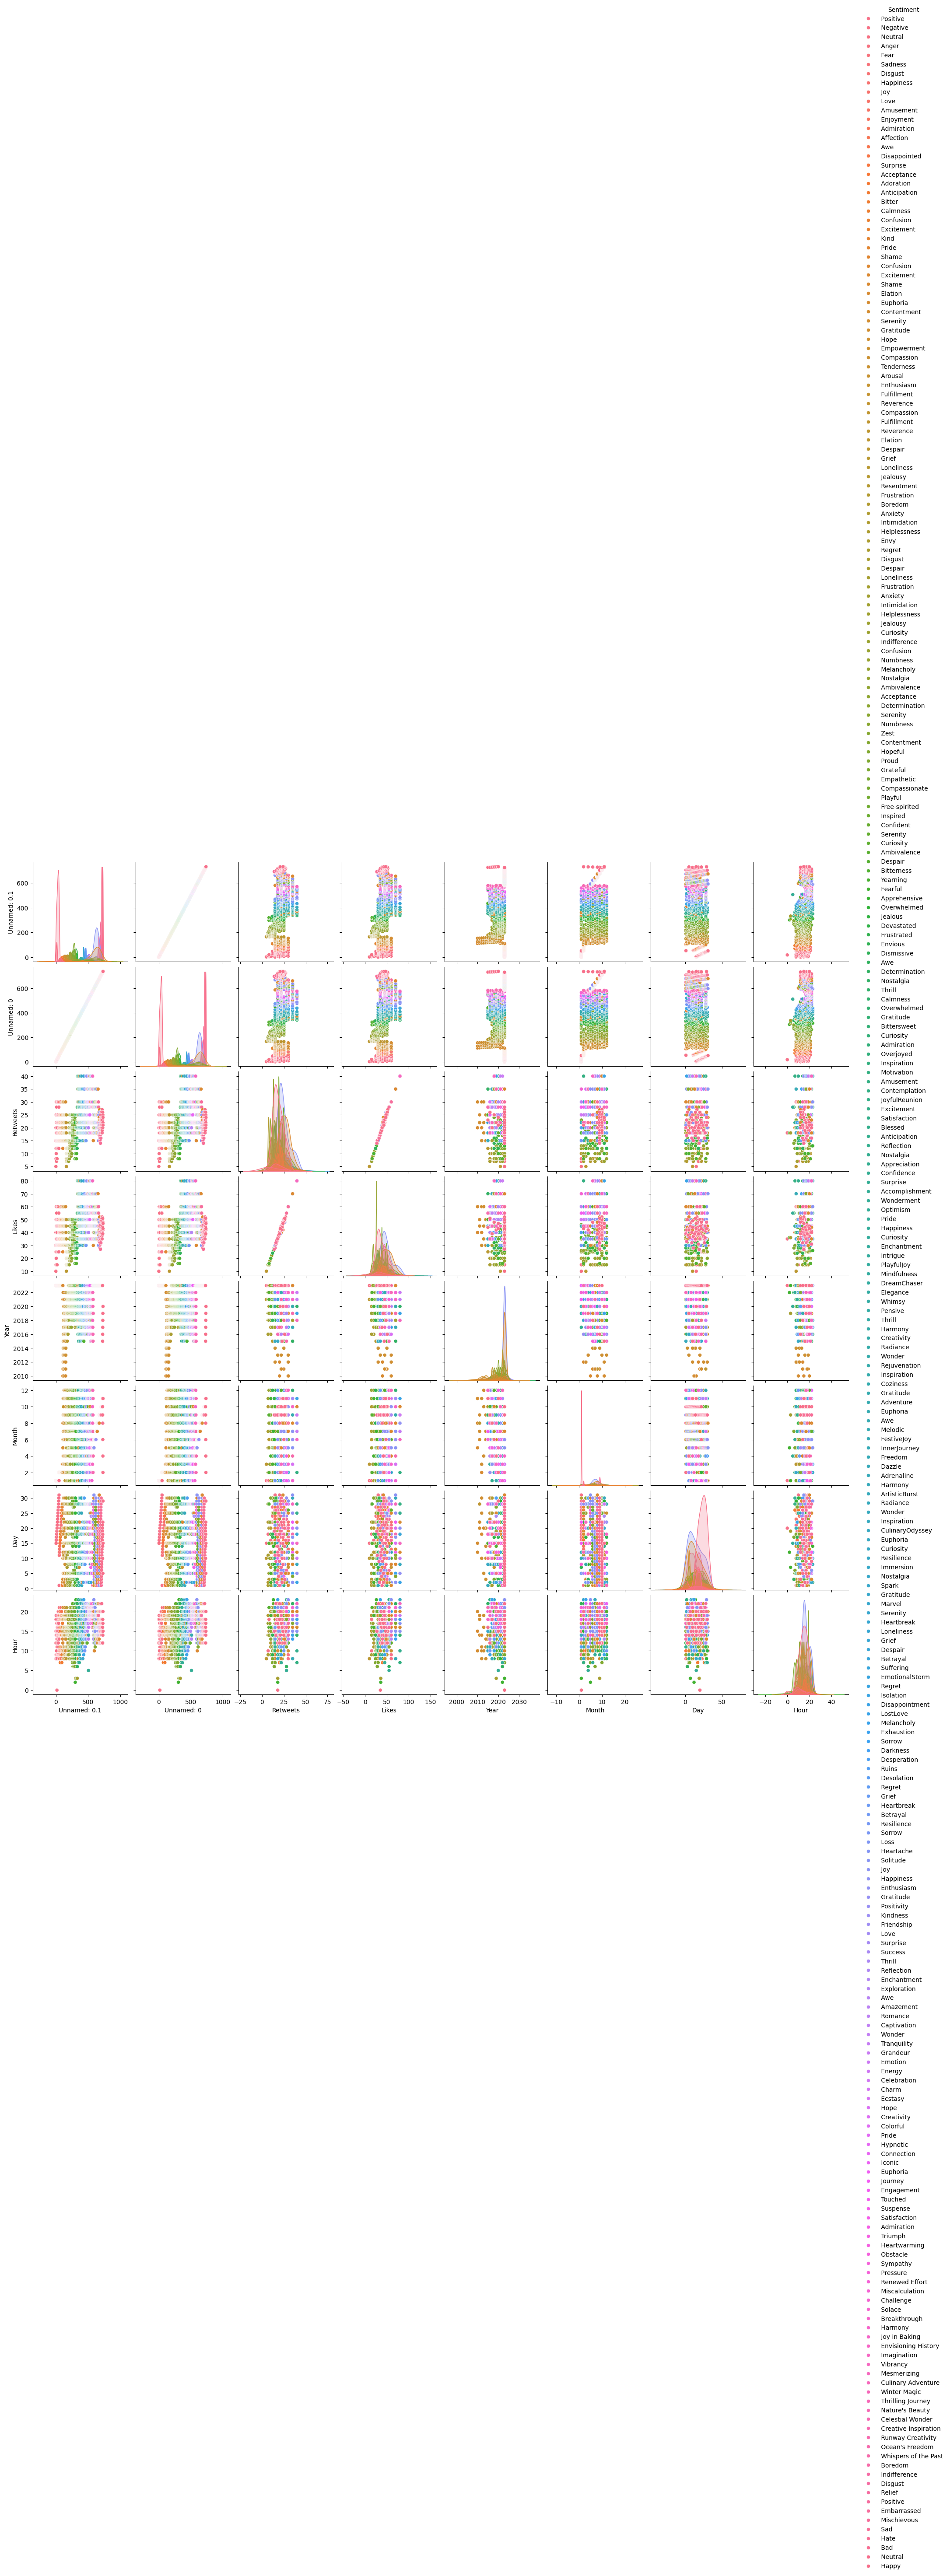

In [8]:
# Pairplot
plt.figure(figsize=(15,10))
sns.pairplot(df, hue='Sentiment')
plt.show()

Sentiment count analysis

C:\Users\amida\AppData\Local\Temp\ipykernel_33660\3067196260.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
C:\Users\amida\AppData\Local\Temp\ipykernel_33660\3067196260.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


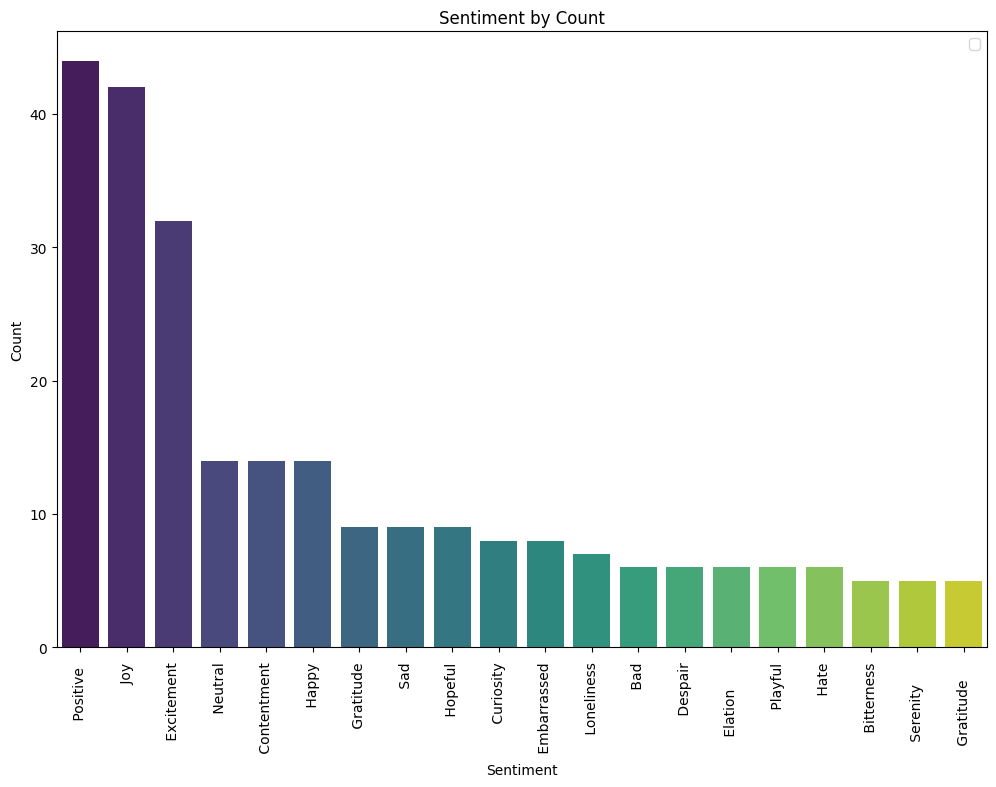

In [10]:
# Count sentiment categories
sentiment_counts = df['Sentiment'].value_counts().head(20)

# plot
plt.figure(figsize=(12,8))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment by Count')
plt.xticks(rotation=90)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend()
plt.show()


Post by Platforms

C:\Users\amida\AppData\Local\Temp\ipykernel_33660\3228178387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Platform'], palette='dark')


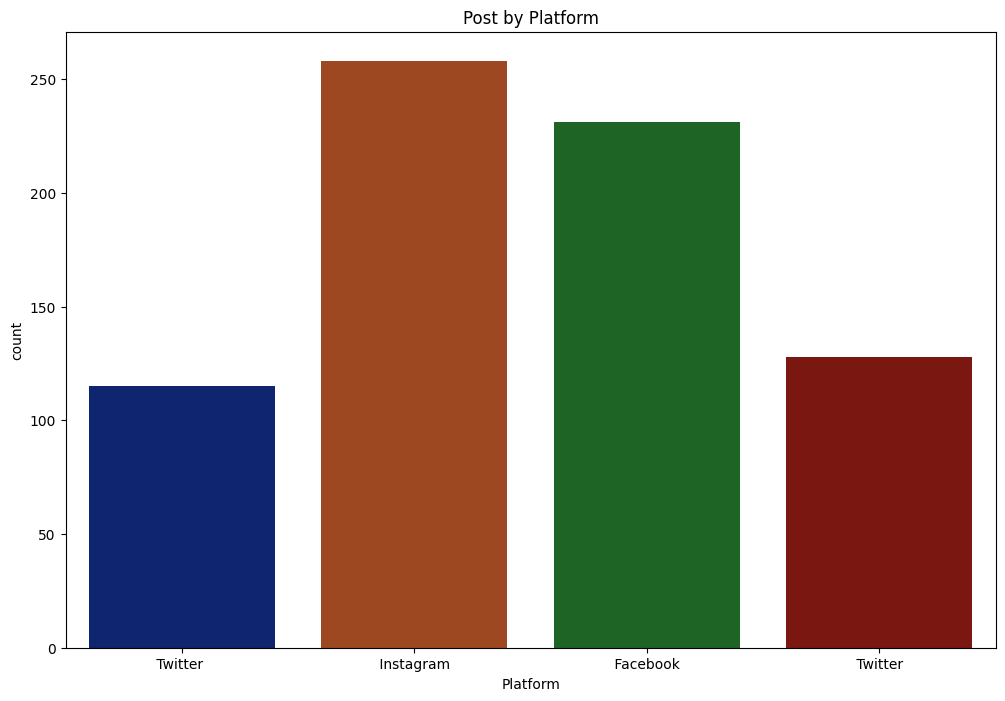

In [11]:
# BarPlot

plt.figure(figsize=(12,8))
sns.countplot(x=df['Platform'], palette='dark')
plt.title('Post by Platform')
plt.show()

Likes per Hours

C:\Users\amida\AppData\Local\Temp\ipykernel_33660\3918096259.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  chart = sns.lineplot(x=df['Hour'], y=df['Likes'], palette='muted', color='red')


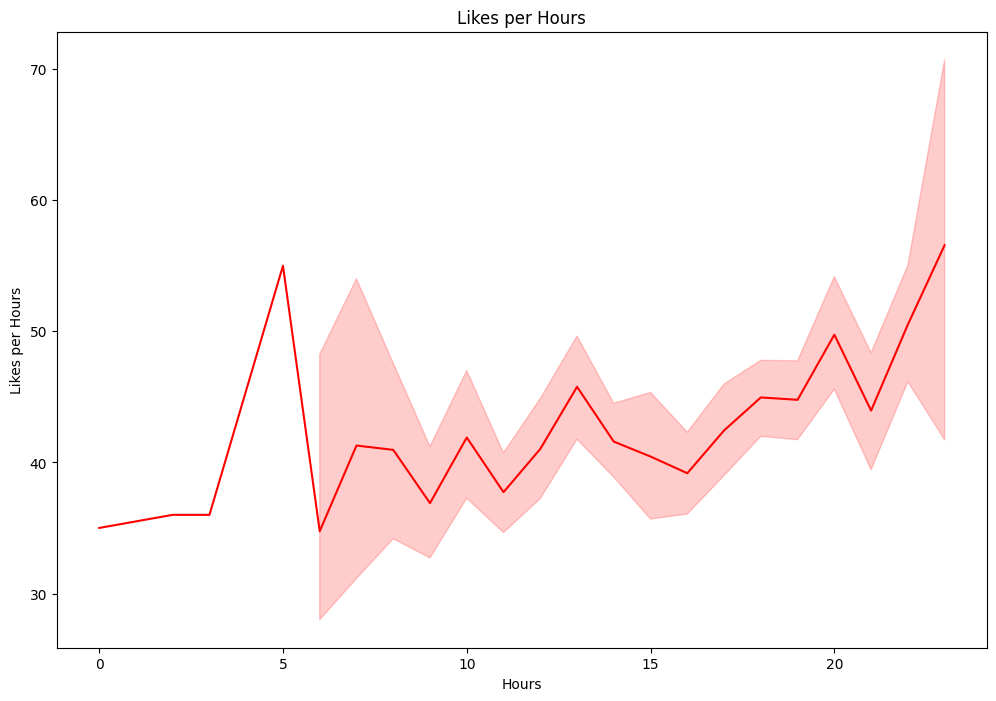

In [12]:
# Line chart

plt.figure(figsize=(12,8))
chart = sns.lineplot(x=df['Hour'], y=df['Likes'], palette='muted', color='red')

plt.title('Likes per Hours')
plt.xlabel('Hours')
plt.ylabel('Likes per Hours')
plt.show()



Top 5 Country by Likes


C:\Users\amida\AppData\Local\Temp\ipykernel_33660\218114715.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=Top5Country_data, x='Country',y='Likes', palette='plasma')


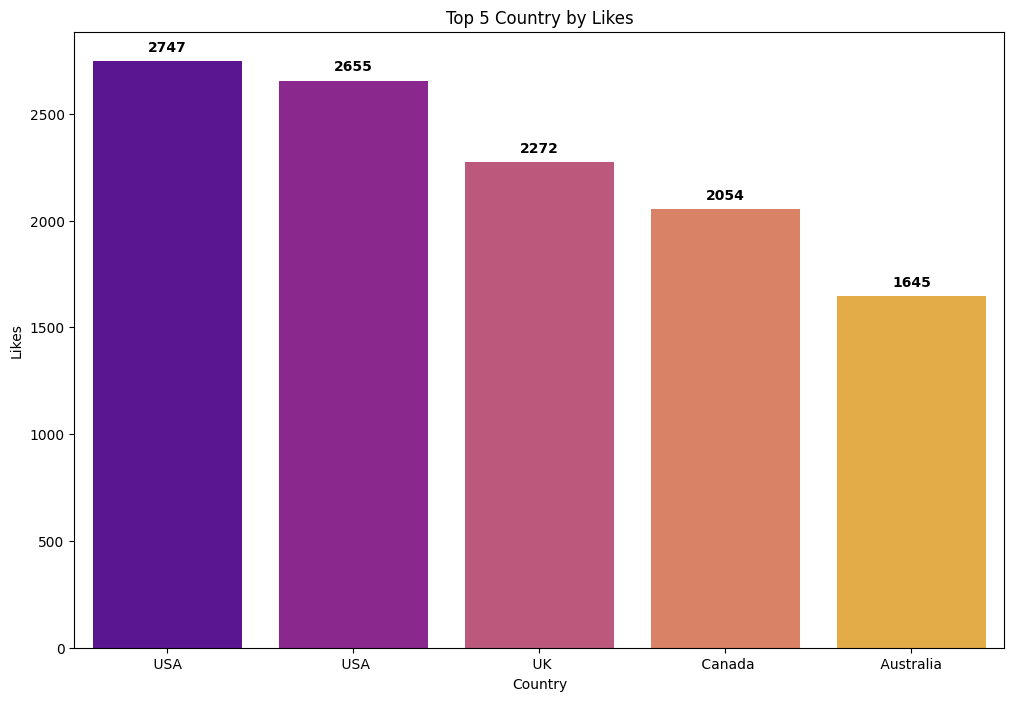

In [13]:
# Created new dataframe with country and likes coolumns
country_df = df[['Country', 'Likes']]
# Sort the top 5 country by likes 
country_likes = country_df.groupby('Country')['Likes'].sum().sort_values(ascending=False).head(5)

# reset the dataframe
Top5Country_data = country_likes.reset_index()

# Bar Plot
plt.figure(figsize=(12,8))
plot = sns.barplot(data=Top5Country_data, x='Country',y='Likes', palette='plasma')

# Add labels using bar_label
for container in plot.containers:
    plot.bar_label(container, padding=5, fmt='%.0f', fontweight='bold')


plt.title('Top 5 Country by Likes')
plt.xlabel('Country')
plt.ylabel('Likes')
plt.show()

In [14]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,cleaned_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying a beautiful day at the park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic was terrible this morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,just finished an amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited about the upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying out a new recipe for dinner tonight


Spererate Dependent and independent dataset

In [45]:
# X = df['cleaned_text']

# convert all texts to lowercase & strip the white spaces in the 'Sentiment' column
df['Sentiment'] = df['Sentiment'].str.lower()
df['Sentiment'] = df['Sentiment'].str.strip()
df['Sentiment'].value_counts().shape
X = df['cleaned_text']
y = df['Sentiment']
print(X)
# check the shape of the data
print(X.shape)
print(y.shape)

0                   enjoying a beautiful day at the park
1                      traffic was terrible this morning
2                       just finished an amazing workout
3             excited about the upcoming weekend getaway
4             trying out a new recipe for dinner tonight
                             ...                        
727    collaborating on a science project that receiv...
728    attending a surprise birthday party organized ...
729    successfully fundraising for a school charity ...
730    participating in a multicultural festival cele...
731    organizing a virtual talent show during challe...
Name: cleaned_text, Length: 732, dtype: object
(732,)
(732,)


Sentiment Prediction by Using Naive Bayes 

In [46]:


# Train and test the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing -convert Text to numerical features

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



# Innitialize multinomial naive bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

Predict the model

In [47]:
y_pred = model.predict(X_test_vec)

In [48]:
# Check the accuracy score and classification report of the model
print(f"Accuracy score : {accuracy_score(y_test, y_pred) *100:.2f}%")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

Accuracy score : 23.81%
Classification Report:                       precision    recall  f1-score   support

          acceptance       1.00      1.00      1.00         2
          admiration       0.00      0.00      0.00         2
           affection       0.00      0.00      0.00         1
         ambivalence       0.00      0.00      0.00         1
               anger       0.00      0.00      0.00         1
        anticipation       0.00      0.00      0.00         1
             arousal       0.00      0.00      0.00         3
                 awe       0.00      0.00      0.00         2
                 bad       0.00      0.00      0.00         1
            betrayal       0.00      0.00      0.00         3
              bitter       0.00      0.00      0.00         1
          bitterness       0.00      0.00      0.00         1
         bittersweet       0.00      0.00      0.00         1
             boredom       0.00      0.00      0.00         1
            calmness  

c:\Users\amida\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amida\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amida\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", l

Random Forest classifier


In [49]:
from sklearn.ensemble import RandomForestClassifier


In [50]:
random_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_model.fit(X_train_vec, y_train)


RandomForestClassifier(random_state=42)

In [51]:
# Predict the model
model_pred = random_model.predict(X_test_vec)

In [52]:
# Check the accuracy score and classification report of the model
print(f"Accuracy score : {accuracy_score(y_test, model_pred) *100:.2f}%")
print(f"Classification Report: {classification_report(y_test, model_pred)}")

Accuracy score : 40.82%
Classification Report:                       precision    recall  f1-score   support

          acceptance       1.00      1.00      1.00         2
      accomplishment       0.00      0.00      0.00         0
          admiration       0.00      0.00      0.00         2
           affection       1.00      1.00      1.00         1
         ambivalence       0.50      1.00      0.67         1
               anger       0.00      0.00      0.00         1
        anticipation       0.00      0.00      0.00         1
             arousal       1.00      0.67      0.80         3
       artisticburst       0.00      0.00      0.00         0
                 awe       0.00      0.00      0.00         2
                 bad       0.00      0.00      0.00         1
            betrayal       0.00      0.00      0.00         3
              bitter       0.00      0.00      0.00         1
          bitterness       0.50      1.00      0.67         1
         bittersweet  

c:\Users\amida\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amida\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amida\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", l

Using GridSearchCV to improve Accuracy score

In [53]:
from sklearn.model_selection import GridSearchCV

random_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)

model_pred = model.predict(X_test_vec)

print(f"Acciracy Score: {accuracy_score(y_test, model_pred)}")

Acciracy Score: 0.3877551020408163


In [55]:


param_grid = {
    'n_estimators' : [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(estimator=random_model,param_grid= param_grid, cv=3, verbose=1, scoring='accuracy')
grid.fit(X_train_vec, y_train)



Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\amida\AppData\Local\Programs\Python\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [56]:
# predict the model
grid_pred = grid.predict(X_test_vec)


In [57]:
# Check the accuracy score and classification report of the model
print(f"Accuracy score : {accuracy_score(y_test, grid_pred) *100:.2f}%")
print(f"Classification Report: {classification_report(y_test, grid_pred)}")

Accuracy score : 40.82%
Classification Report:                       precision    recall  f1-score   support

          acceptance       0.67      1.00      0.80         2
          admiration       0.00      0.00      0.00         2
           affection       0.00      0.00      0.00         1
         ambivalence       0.50      1.00      0.67         1
               anger       0.00      0.00      0.00         1
        anticipation       0.00      0.00      0.00         1
             arousal       1.00      0.33      0.50         3
       artisticburst       0.00      0.00      0.00         0
                 awe       0.50      0.50      0.50         2
                 bad       1.00      1.00      1.00         1
            betrayal       0.00      0.00      0.00         3
              bitter       0.00      0.00      0.00         1
          bitterness       1.00      1.00      1.00         1
         bittersweet       0.00      0.00      0.00         1
             boredom  

c:\Users\amida\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amida\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amida\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", l